# Séries chronologiques

In [1]:
import utils.functions as f
from datetime import datetime
import numpy as np
import pandas as pd

START_DATE = datetime(2021, 1, 1) 
END_DATE = datetime(2023, 4, 1)
MID_DATE = datetime(2023, 1, 1)

STOCK = 'AAPL'
df = f.get_stock_data(STOCK, START_DATE, END_DATE)
df["date"] = pd.to_datetime(df["date"])
df.head()

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj_close,volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002098,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572342,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.483978,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592972,105158200


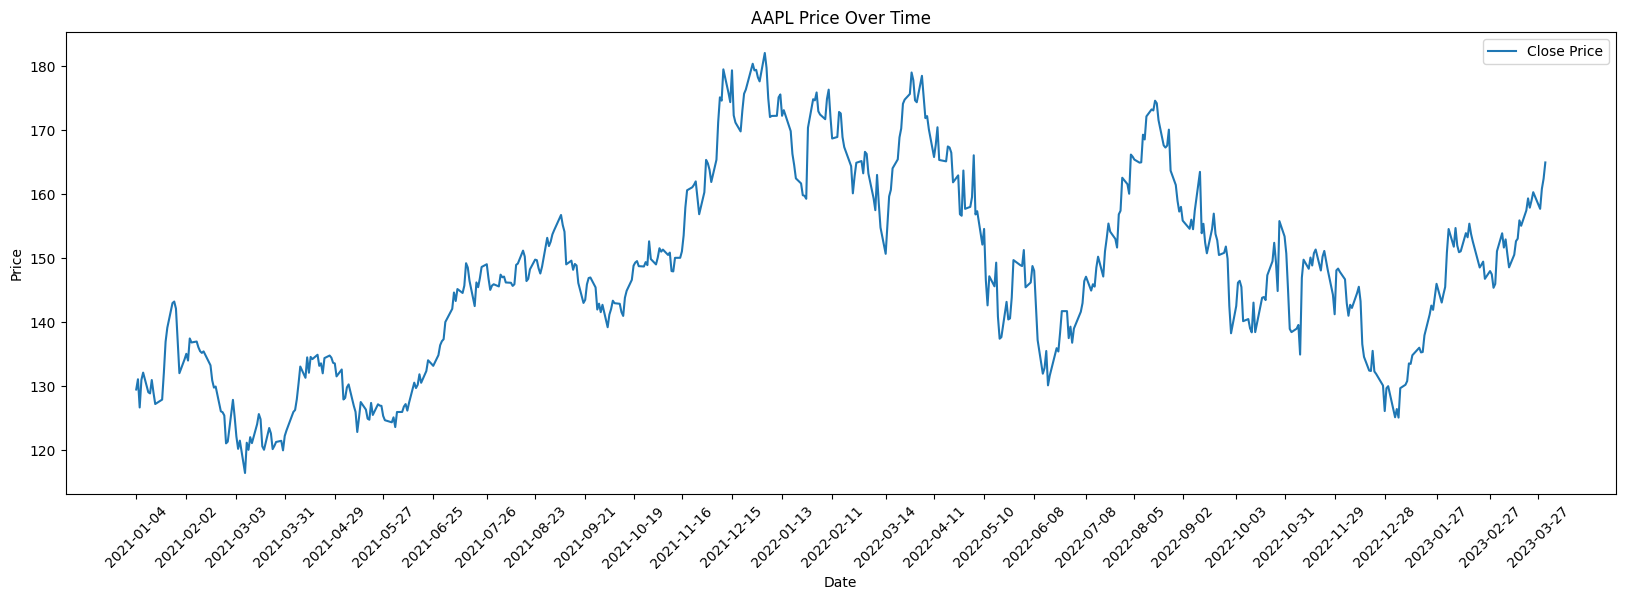

In [2]:
f.plot_stock_data(df, "close", STOCK)

## Autocorrélation

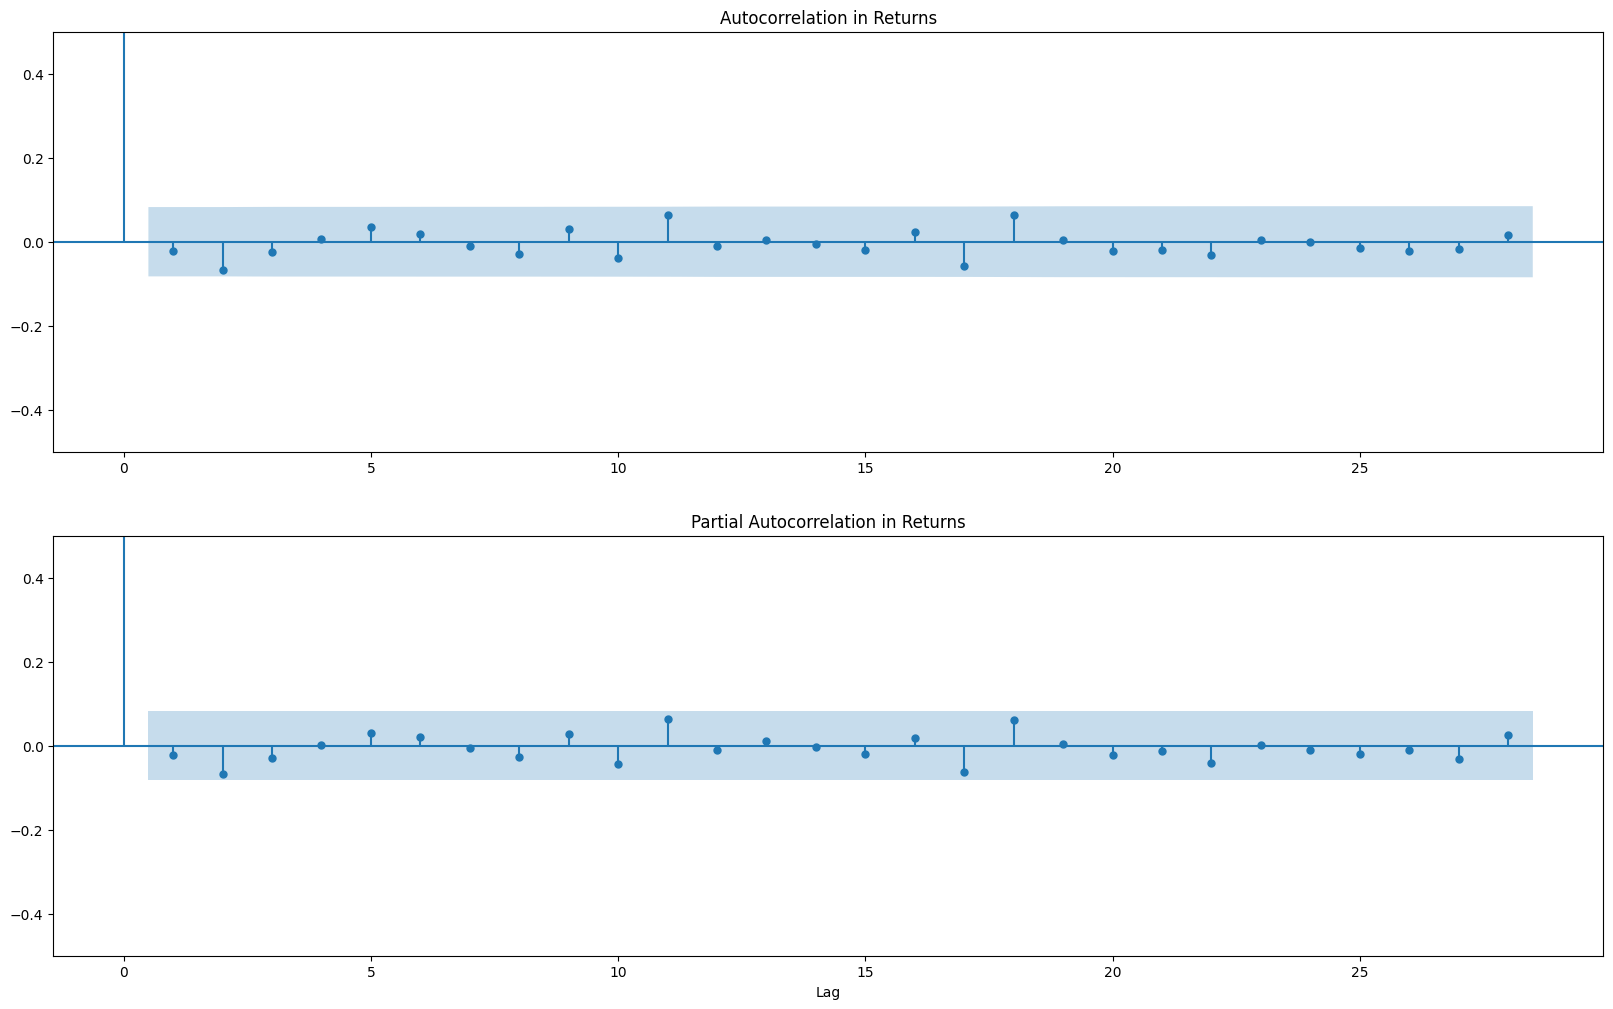

In [3]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df['return'] = df['close'].pct_change().dropna()

# Plot ACF and PACF
diff_ts = df['return'].iloc[1:]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
plot_acf(diff_ts, ax=ax1)
ax1.set_ylim(-0.5, .5) 
ax1.set_title("Autocorrelation in Returns")
plot_pacf(diff_ts, ax=ax2)
ax2.set_ylim(-0.5, .5)  
ax2.set_xlabel("Lag")  
ax2.set_title("Partial Autocorrelation in Returns")

plt.show()


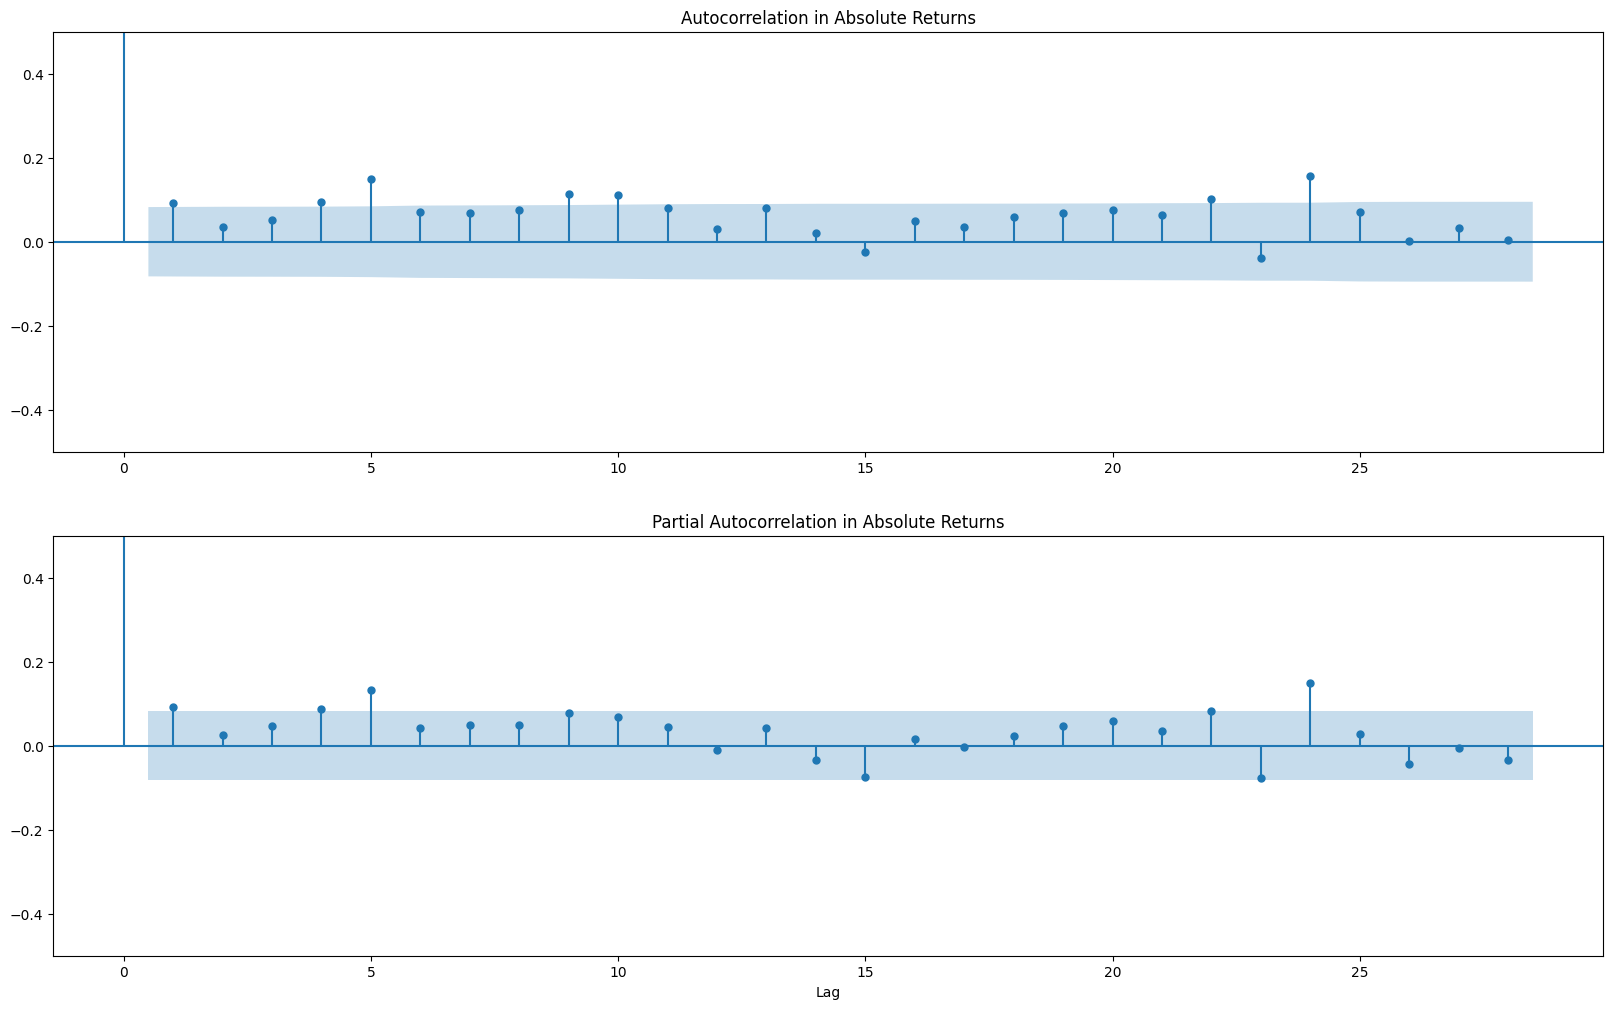

In [4]:
# Plot ACF and PACF of absolute returns
abs_returns = diff_ts.abs()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
plot_acf(abs_returns, ax=ax1)
ax1.set_ylim(-.5, .5) 
ax1.set_title("Autocorrelation in Absolute Returns")
plot_pacf(abs_returns, ax=ax2)
ax2.set_ylim(-.5, .5)  
ax2.set_title("Partial Autocorrelation in Absolute Returns")
ax2.set_xlabel("Lag")  

plt.show();

In [5]:
# normality test
stats.normaltest(df['close'])

NormaltestResult(statistic=30.394901990144195, pvalue=2.5109085402754433e-07)


## Processus autorégressif et moyenne mobile intégré

In [6]:
# ARIMA
train_df = df[df['date'] < MID_DATE]
test_df = df[df['date'] >= MID_DATE]

model = ARIMA(train_df['close'], order =(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  503
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1242.437
Date:                Tue, 09 Apr 2024   AIC                           2490.874
Time:                        11:26:52   BIC                           2503.530
Sample:                             0   HQIC                          2495.839
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6152      0.418      1.472      0.141      -0.204       1.434
ma.L1         -0.6560      0.403     -1.628      0.104      -1.446       0.134
sigma2         8.2652      0.439     18.824      0.0

                0
count  503.000000
mean     0.258430
std      6.446618
min     -9.305386
25%     -1.563847
50%      0.022863
75%      1.812051
max    129.410004


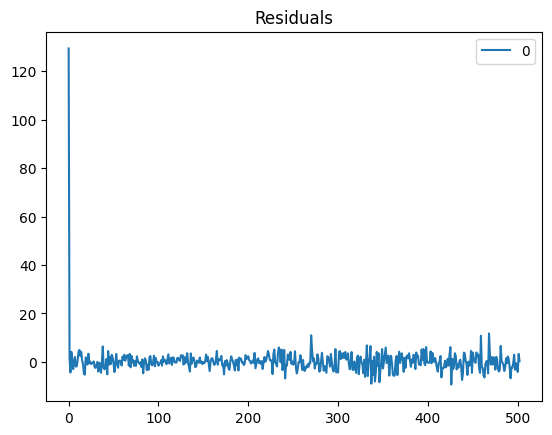

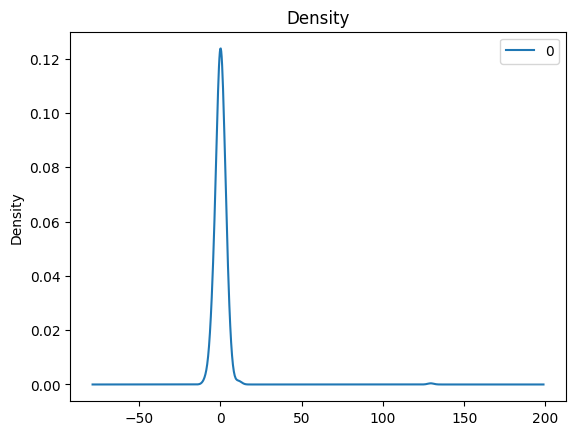

In [7]:
# residuals
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(title='Residuals')
residuals.plot(kind='kde', title='Density')
print(residuals.describe())





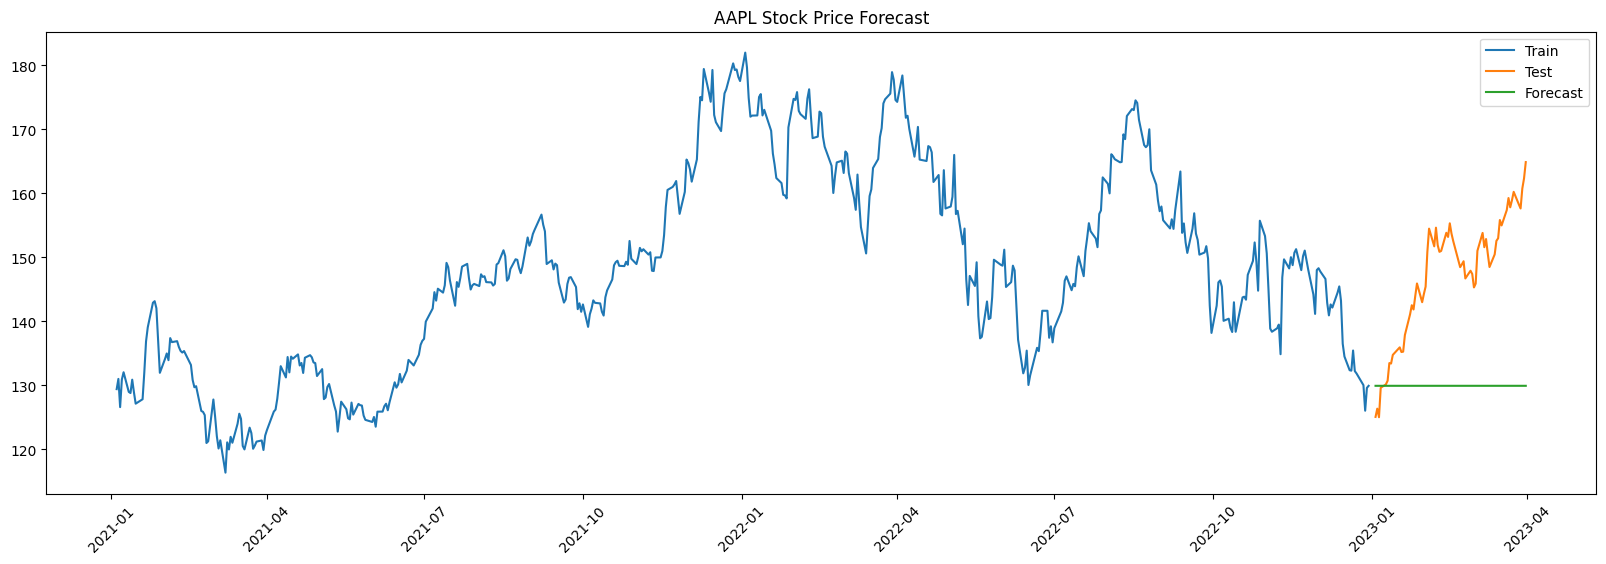

In [8]:
# forecast
forecast = model_fit.forecast(steps=len(test_df))

forecast = pd.DataFrame(forecast.values, columns=['close'])
forecast['date'] = test_df['date'].values

plt.figure(figsize=(20, 6))
plt.plot(train_df['date'], train_df['close'], label='Train')
plt.plot(test_df['date'], test_df['close'], label='Test')
plt.plot(forecast['date'], forecast['close'], label='Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.title(f'{STOCK} Stock Price Forecast')
plt.show()

## SARIMA

In [9]:
# SARIMA model to capture seasonal changes
from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = SARIMAX(train_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 66))
# # The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. Default is an AR(1) model: (1,0,0).
# # The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. D must be an integer indicating the integration order of the process, while P and Q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.
# model_fit = model.fit()
# print(model_fit.summary())


In [10]:

# forecast = model_fit.forecast(steps=len(test_df))

# forecast = pd.DataFrame(forecast.values, columns=['close'])
# forecast['date'] = test_df['date'].values

# plt.figure(figsize=(20, 6))
# plt.plot(train_df['date'], train_df['close'], label='Train')
# plt.plot(test_df['date'], test_df['close'], label='Test')
# plt.plot(forecast['date'], forecast['close'], label='Forecast')
# plt.legend()
# plt.xticks(rotation=45)
# plt.title(f'{STOCK} Stock Price Forecast')
# plt.show()


In [11]:
START_DATE = datetime(2024, 3, 7)
MID_DATE = datetime(2024, 4, 1)
END_DATE = datetime(2024, 4, 7)
hourly_df = f.get_hourly_stock_data('AAPL', START_DATE, END_DATE)
hourly_df.head(20)


[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj_close,volume
0,2024-03-07 09:30:00,169.149994,169.779999,168.490005,169.722504,169.722504,11196605
1,2024-03-07 10:00:00,169.727005,169.729996,168.899994,168.970001,168.970001,4314700
2,2024-03-07 10:30:00,168.979996,169.080002,168.610001,168.757797,168.757797,4105038
3,2024-03-07 11:00:00,168.679993,169.529999,168.619995,169.279999,169.279999,4357452
4,2024-03-07 11:30:00,169.289993,169.389999,168.919998,169.220001,169.220001,3060543
5,2024-03-07 12:00:00,169.225006,169.600006,168.991699,169.160004,169.160004,3608799
6,2024-03-07 12:30:00,169.169998,169.380005,169.009995,169.115005,169.115005,2709232
7,2024-03-07 13:00:00,169.110001,169.649994,168.990005,169.625000,169.625000,3185366
8,2024-03-07 13:30:00,169.630005,170.600006,169.550003,170.559998,170.559998,5576514
9,2024-03-07 14:00:00,170.570007,170.729996,169.770004,170.100006,170.100006,4381030


Text(0.5, 1.0, 'AAPL Stock Price over 1 day')

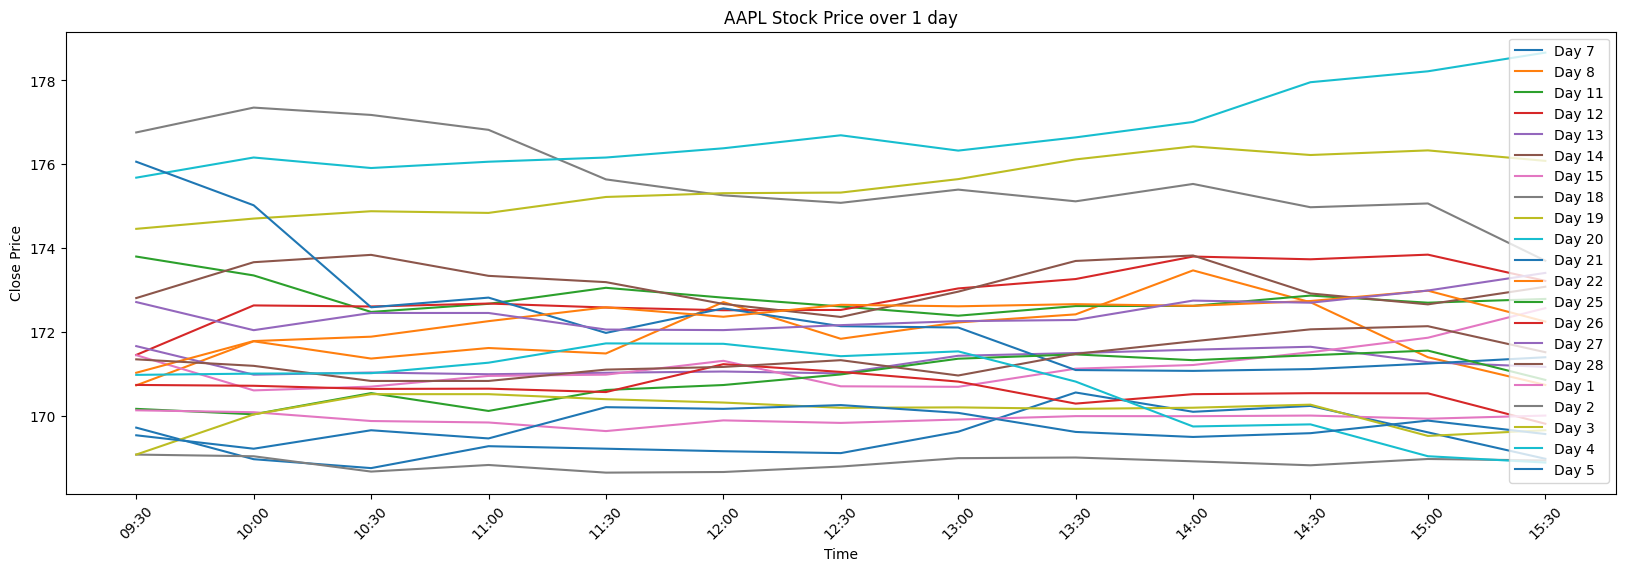

In [12]:
# for each day plot the hourly data
# iter over each day and plot the 30m data

hourly_df['date'] = pd.to_datetime(hourly_df['date'])
hourly_df['day'] = hourly_df['date'].dt.day
hourly_df['hour_minute'] = hourly_df['date'].dt.strftime('%H:%M')

days = hourly_df['day'].unique()
hour_minute = hourly_df['hour_minute'].unique()

plt.figure(figsize=(20, 6))

for day in days:
    day_df = hourly_df[hourly_df['day'] == day]
    plt.plot(day_df['hour_minute'], day_df['close'], label=f'Day {day}')

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()

plt.title(f'{STOCK} Stock Price over 1 day')


In [13]:
# make a seasonal SARIMA model to forecast the 30m data

train_df = hourly_df[hourly_df['date'] < MID_DATE]
test_df = hourly_df[hourly_df['date'] >= MID_DATE]

model = SARIMAX(train_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, len(hour_minute)))
model_fit = model.fit()
print(model_fit.summary())



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23977D+00    |proj g|=  3.49352D-01

At iterate    5    f=  1.12058D+00    |proj g|=  3.41930D-02

At iterate   10    f=  1.11573D+00    |proj g|=  6.24468D-03

At iterate   15    f=  1.11554D+00    |proj g|=  2.03490D-03

At iterate   20    f=  1.11553D+00    |proj g|=  8.11374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   6.362D-06   1.116D+00
  F =   1.1155304050912123     

CONVERG

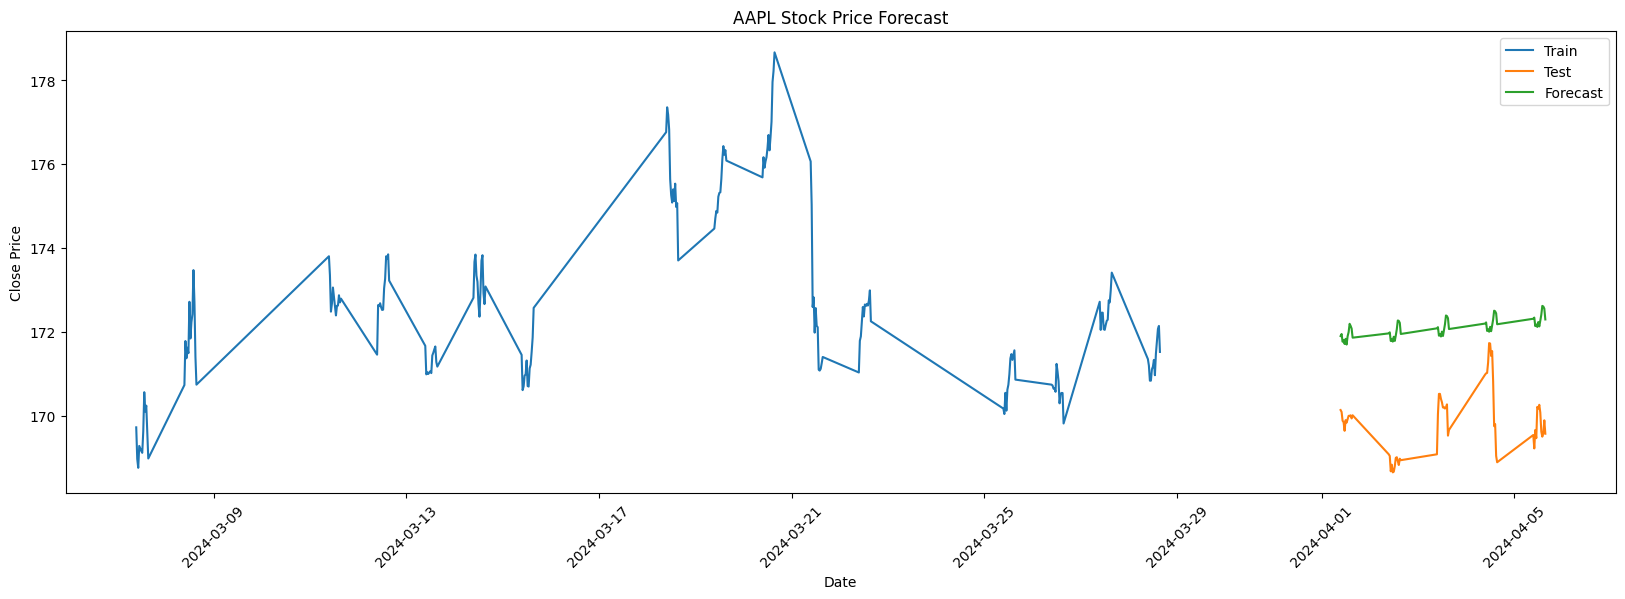

In [14]:
# forecast 
forecast = model_fit.forecast(steps=len(test_df))

forecast = pd.DataFrame(forecast.values, columns=['close'])
forecast['date'] = test_df['date'].values

plt.figure(figsize=(20, 6))
plt.plot(train_df['date'], train_df['close'], label='Train')
plt.plot(test_df['date'], test_df['close'], label='Test')
plt.plot(forecast['date'], forecast['close'], label='Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{STOCK} Stock Price Forecast')
plt.show()
